# Model Training & Evaluation via Scikit-Learn

This notebooks uses the train/test sample data generated in `1_eda_cleaning_feature_engineering_sample.ipynb` to set-up and test my modeling pipelines using Scikit-Learn. Once ready, I'll be leverage Azure Databricks to run my pipelines at scale. We'll compare two modeling techniques:
1. Penalized Logistic Regression
2. Gradient-Boosted Trees 

In [1]:
# import libraries
import sys
sys.path.append("../src")
from sparkifychurn import trainModel, evaluateModel
import pandas as pd
pd.set_option("max.columns", None)
pd.set_option("max.rows", None)
import seaborn as sns
import numpy as np

## Load Data 

In [2]:
train = pd.read_parquet("../data/train_data_sample")
test = pd.read_parquet("../data/test_data_sample")

In [3]:
train.head()

,userId,gender,count_items,sum_length,paid,session_count,submit_downgrade_count,thumbs_down_count,home_count,downgrade_count,advert_count,save_settings_count,churn,about_count,settings_count,add_playlist_count,add_friend_count,next_song_count,thumbs_up_count,help_count,upgrade_count,error_count,submit_upgrade,non_song_interaction_count,PUT_200_count,GET_200_count,PUT_307_count,tenure_days,thumbs_up_pct,avg_items_session,avg_songs_session,sum_session_length_hours,avg_session_length_hours,interaction_rate,submit_downgrade_rate,thumbs_down_rate,home_rate,downgrade_rate,advert_rate,save_settings_rate,about_rate,settings_rate,add_playlist_rate,add_friend_rate,next_song_rate,thumbs_up_rate,help_rate,upgrade_rate,error_rate,non_song_interaction_rate
0,125,M,11,2089.11310,0,1,0,0,0,0,1,0,1,0,0,0,0,8,0,0,0,0,0,2,8,2,1,0.020532,0.000000,11.000000,8.000000,0.492778,0.492778,22.322435,0.000000,0.000000,0.000000,0.000000,2.029312,0.000000,0.000000,0.000000,0.000000,0.000000,16.234498,0.000000,0.000000,0.000000,0.000000,4.058625
1,51,M,2464,523275.84280,1,10,0,21,75,23,0,1,1,2,12,52,28,2111,100,12,0,1,0,352,2163,125,175,15.779398,0.826446,246.400000,211.100000,145.392778,14.539278,16.947197,0.000000,0.144436,0.515844,0.158192,0.000000,0.006878,0.013756,0.082535,0.357652,0.192582,14.519291,0.687792,0.082535,0.000000,0.006878,2.421028
2,54,F,3437,711344.91954,1,37,1,29,129,39,47,3,1,5,17,72,33,2841,163,17,1,1,1,595,2913,256,267,42.797199,0.848958,92.891892,76.783784,198.745278,5.371494,17.293493,0.005032,0.145915,0.649072,0.196231,0.236484,0.015095,0.025158,0.085537,0.362273,0.166042,14.294679,0.820145,0.085537,0.005032,0.005032,2.993782
3,100014,M,310,67703.47208,1,6,0,3,7,3,2,0,1,0,1,7,6,257,17,2,0,0,0,52,264,16,30,41.244363,0.850000,51.666667,42.833333,18.481389,3.080231,16.773631,0.000000,0.162325,0.378759,0.162325,0.108217,0.000000,0.000000,0.054108,0.378759,0.324651,13.905881,0.919844,0.108217,0.000000,0.000000,2.813641
4,101,M,2149,447464.01467,1,10,0,16,74,22,8,2,1,2,9,61,29,1797,86,12,1,3,1,351,1858,129,159,15.861481,0.843137,214.900000,179.700000,136.263333,13.626333,15.770934,0.000000,0.117420,0.543066,0.161452,0.058710,0.014677,0.014677,0.066049,0.447663,0.212823,13.187700,0.631131,0.088065,0.007339,0.022016,2.575895


In [4]:
X_train = train.drop("churn", axis=1)
y_train = train["churn"]

X_test = test.drop("churn", axis=1)
y_test = test["churn"]

In [5]:
X_train.head()

,userId,gender,count_items,sum_length,paid,session_count,submit_downgrade_count,thumbs_down_count,home_count,downgrade_count,advert_count,save_settings_count,about_count,settings_count,add_playlist_count,add_friend_count,next_song_count,thumbs_up_count,help_count,upgrade_count,error_count,submit_upgrade,non_song_interaction_count,PUT_200_count,GET_200_count,PUT_307_count,tenure_days,thumbs_up_pct,avg_items_session,avg_songs_session,sum_session_length_hours,avg_session_length_hours,interaction_rate,submit_downgrade_rate,thumbs_down_rate,home_rate,downgrade_rate,advert_rate,save_settings_rate,about_rate,settings_rate,add_playlist_rate,add_friend_rate,next_song_rate,thumbs_up_rate,help_rate,upgrade_rate,error_rate,non_song_interaction_rate
0,125,M,11,2089.11310,0,1,0,0,0,0,1,0,0,0,0,0,8,0,0,0,0,0,2,8,2,1,0.020532,0.000000,11.000000,8.000000,0.492778,0.492778,22.322435,0.000000,0.000000,0.000000,0.000000,2.029312,0.000000,0.000000,0.000000,0.000000,0.000000,16.234498,0.000000,0.000000,0.000000,0.000000,4.058625
1,51,M,2464,523275.84280,1,10,0,21,75,23,0,1,2,12,52,28,2111,100,12,0,1,0,352,2163,125,175,15.779398,0.826446,246.400000,211.100000,145.392778,14.539278,16.947197,0.000000,0.144436,0.515844,0.158192,0.000000,0.006878,0.013756,0.082535,0.357652,0.192582,14.519291,0.687792,0.082535,0.000000,0.006878,2.421028
2,54,F,3437,711344.91954,1,37,1,29,129,39,47,3,5,17,72,33,2841,163,17,1,1,1,595,2913,256,267,42.797199,0.848958,92.891892,76.783784,198.745278,5.371494,17.293493,0.005032,0.145915,0.649072,0.196231,0.236484,0.015095,0.025158,0.085537,0.362273,0.166042,14.294679,0.820145,0.085537,0.005032,0.005032,2.993782
3,100014,M,310,67703.47208,1,6,0,3,7,3,2,0,0,1,7,6,257,17,2,0,0,0,52,264,16,30,41.244363,0.850000,51.666667,42.833333,18.481389,3.080231,16.773631,0.000000,0.162325,0.378759,0.162325,0.108217,0.000000,0.000000,0.054108,0.378759,0.324651,13.905881,0.919844,0.108217,0.000000,0.000000,2.813641
4,101,M,2149,447464.01467,1,10,0,16,74,22,8,2,2,9,61,29,1797,86,12,1,3,1,351,1858,129,159,15.861481,0.843137,214.900000,179.700000,136.263333,13.626333,15.770934,0.000000,0.117420,0.543066,0.161452,0.058710,0.014677,0.014677,0.066049,0.447663,0.212823,13.187700,0.631131,0.088065,0.007339,0.022016,2.575895


# Modeling

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
import joblib

### Train Logistic Regression Pipeline 

In [7]:
# Define variable types 
cat_vars = ["gender"]
bin_vars = ["paid", "submit_upgrade"]
num_vars = list(set(X_train.columns) - set(["userId", *bin_vars, *cat_vars]))

# Create hyper parameter grid for Logistic Regression
param_grid = {"model__penalty":["l1", "l2"],
              "model__C": np.logspace(-4,4,5), 
              "model__solver" : ["liblinear"]}

model = LogisticRegression()


cat_transformer = Pipeline(steps = [("impute", SimpleImputer(strategy = "most_frequent", missing_values = None)),
                                    ("ohe", OneHotEncoder())])

num_transformer = Pipeline(steps = [("impute", SimpleImputer(strategy = "median")),
                                    ("scaler", StandardScaler())])

bin_transformer = Pipeline(steps = [("impute", SimpleImputer(strategy = "most_frequent"))])

preprocessor = ColumnTransformer(transformers = [('cat', cat_transformer, cat_vars),
                                                 ('num', num_transformer, num_vars), 
                                                 ('bin', bin_transformer, bin_vars)],
                                  remainder = "drop")

model_pipeline = Pipeline(steps=[("preprocessing", preprocessor),
                                 ("model",model)])

# Fit grid hyperparameter search model
lr_model = RandomizedSearchCV(model_pipeline, 
                              param_grid, 
                              cv = 5, 
                              random_state = 42)
lr_model = lr_model.fit(X_train, y_train)

Logistic_Regression - Train Set AUROC: 0.949
Logistic_Regression - Test Set AUROC: 0.752


Logistic_Regression - Train Average Precision: 0.866
Logistic_Regression - Test Average Precision: 0.447


Logistic_Regression - Train No Skill Precision: 0.24
Logistic_Regression - Test No Skill Precision: 0.207

 ****Classification Report on Train Data***
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       127
           1       0.83      0.75      0.79        40

    accuracy                           0.90       167
   macro avg       0.88      0.85      0.86       167
weighted avg       0.90      0.90      0.90       167


 ****Classification Report on Test Data***
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        46
           1       0.41      0.58      0.48        12

    accuracy                           0.74        58
   macro avg       0.64      0.68      0.66        58
weighted

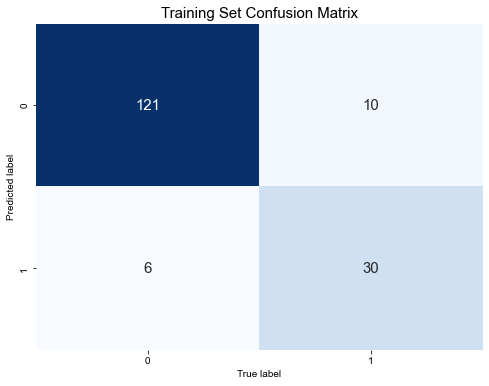

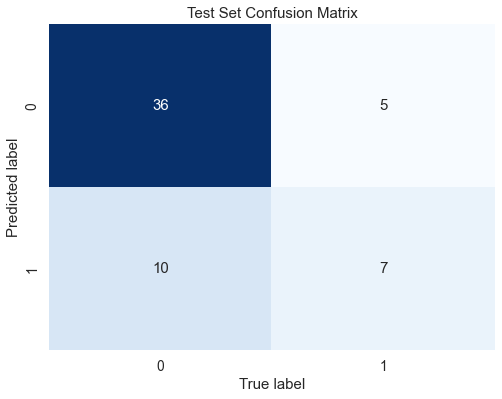

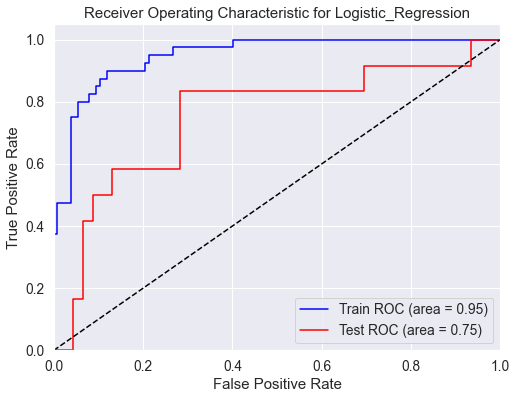

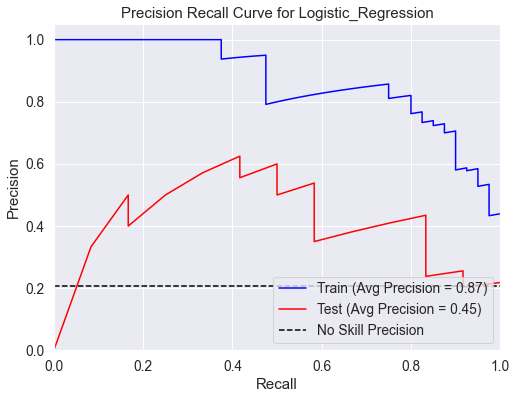

In [8]:
evaluateModel.evaluate_model(model = lr_model,
                             model_type = "sklearn",
                             model_name = "Logistic_Regression",
                             output_path = "../output/sklearn/sample",
                             train = train,
                             test = test)

In [9]:
# Save sklearn model
joblib.dump(lr_model.best_estimator_, "../models/sklearn_lr_sample.pkl", compress=3)

['../models/sklearn_lr_sample.pkl']

### Train Gradient Boosting Classifier Pipeline

In [10]:
# Define variable types 
cat_vars = ["gender"]
bin_vars = ["paid", "submit_upgrade"]
num_vars = list(set(X_train.columns) - set(["userId", *bin_vars, *cat_vars]))

# Create hyper parameter grid for Logistic Regression
param_grid = {"model__learning_rate": [.01, .05, .1, .5, 1],
              "model__max_iter" : [50, 100, 150, 200, 500],
              "model__max_depth": np.linspace(2,20,10)}

model = HistGradientBoostingClassifier()

cat_transformer = Pipeline(steps = [("impute", SimpleImputer(strategy = "most_frequent", missing_values = None)),
                                    ("ohe", OneHotEncoder())])

num_transformer = Pipeline(steps = [("impute", SimpleImputer(strategy = "median")),
                                    ("scaler", StandardScaler())])

bin_transformer = Pipeline(steps = [("impute", SimpleImputer(strategy = "most_frequent"))])

preprocessor = ColumnTransformer(transformers = [('cat', cat_transformer, cat_vars),
                                                 ('num', num_transformer, num_vars), 
                                                 ('bin', bin_transformer, bin_vars)],
                                  remainder = "drop")

model_pipeline = Pipeline(steps=[("preprocessing", preprocessor),
                                 ("model",model)])

# Fit grid hyperparameter search model
gbc_model = RandomizedSearchCV(model_pipeline, 
                              param_grid, 
                              cv = 5, 
                              random_state = 42)
gbc_model = gbc_model.fit(X_train, y_train)

HistGradientBoostingClassifier - Train Set AUROC: 1.0
HistGradientBoostingClassifier - Test Set AUROC: 0.786


HistGradientBoostingClassifier - Train Average Precision: 1.0
HistGradientBoostingClassifier - Test Average Precision: 0.435


HistGradientBoostingClassifier - Train No Skill Precision: 0.24
HistGradientBoostingClassifier - Test No Skill Precision: 0.207

 ****Classification Report on Train Data***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        40

    accuracy                           1.00       167
   macro avg       1.00      1.00      1.00       167
weighted avg       1.00      1.00      1.00       167


 ****Classification Report on Test Data***
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        46
           1       0.46      0.50      0.48        12

    accuracy                           0.78        58


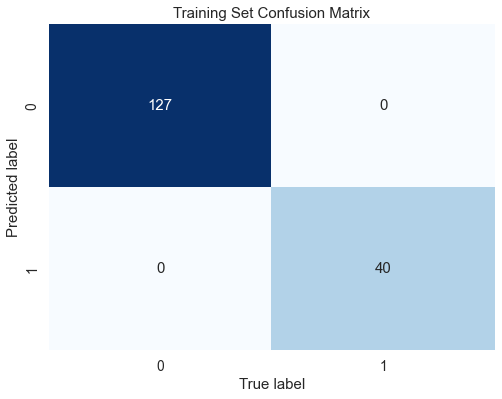

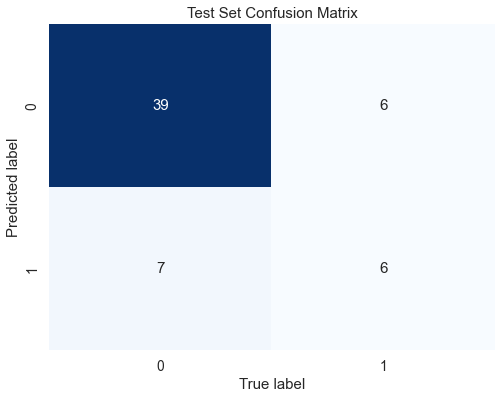

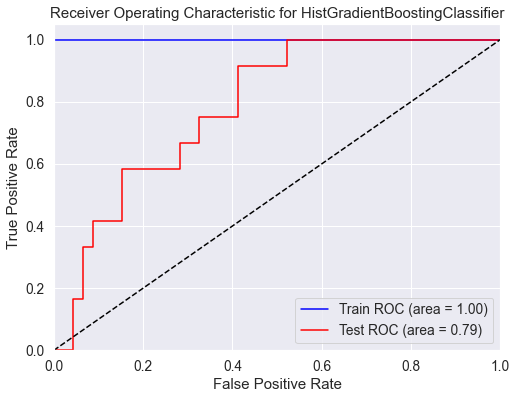

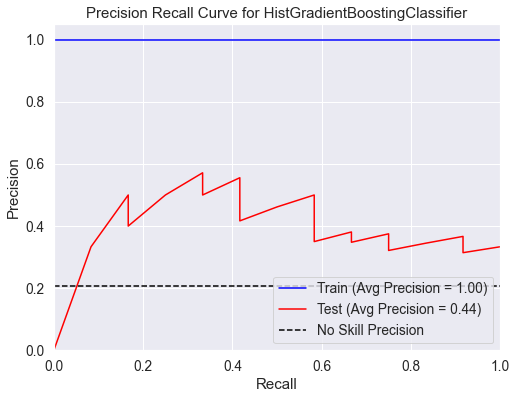

In [11]:
evaluateModel.evaluate_model(model = gbc_model,
                             model_type = "sklearn",
                             model_name = "HistGradientBoostingClassifier",
                             output_path = "../output/sklearn/sample",
                             train = train,
                             test = test)

In [12]:
# Save sklearn model
joblib.dump(gbc_model.best_estimator_, "../models/sklearn_gbc_sample.pkl", compress=3)

['../models/sklearn_gbc_sample.pkl']